**Dataset:** [Rush Kirubi, Kaggle](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings)

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Global variables
year_range = "2010-2016"
figure_size = (10, 6)

## Data preparation

### Reading data

In [3]:
data = pd.read_csv('../datasets/sales_rush_kirubi.csv')
print(data.count())
data.head()

Name               16717
Platform           16719
Year_of_Release    16450
Genre              16717
Publisher          16665
NA_Sales           16719
EU_Sales           16719
JP_Sales           16719
Other_Sales        16719
Global_Sales       16719
Critic_Score        8137
Critic_Count        8137
User_Score         10015
User_Count          7590
Developer          10096
Rating              9950
dtype: int64


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning data

In [4]:
data_clean = data[data['Critic_Count'].notna()]
data_clean = data_clean[data_clean['User_Score'].notna()]
data_clean = data_clean[data_clean['User_Score'] != 'tbd']
data_clean = data_clean[data_clean['Developer'].notna()]
data_clean = data_clean[data_clean['Developer'].notna()]
data_clean = data_clean[data_clean['Rating'].notna()]
data_clean = data_clean[data_clean['Publisher'].notna()]
data_clean = data_clean[data_clean['Year_of_Release'].notna()]
data_clean.count()

Name               6825
Platform           6825
Year_of_Release    6825
Genre              6825
Publisher          6825
NA_Sales           6825
EU_Sales           6825
JP_Sales           6825
Other_Sales        6825
Global_Sales       6825
Critic_Score       6825
Critic_Count       6825
User_Score         6825
User_Count         6825
Developer          6825
Rating             6825
dtype: int64

In [5]:
# filtering to the period of 2010 to 2016
print(data_clean['Year_of_Release'].describe())
data_clean = data_clean[data_clean['Year_of_Release'] >= 2010]
data_clean.describe()

count    6825.000000
mean     2007.436777
std         4.211248
min      1985.000000
25%      2004.000000
50%      2007.000000
75%      2011.000000
max      2016.000000
Name: Year_of_Release, dtype: float64


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000
mean,2012.440805,0.393280,0.295073,0.058479,0.094871,0.841788,71.216659,33.200281,359.293870
std,1.973936,0.849488,0.628733,0.202921,0.207301,1.645649,13.402210,22.752004,871.933007
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2011.000000,0.050000,0.030000,0.000000,0.010000,0.130000,64.000000,14.000000,26.000000
50%,2012.000000,0.140000,0.100000,0.000000,0.030000,0.320000,74.000000,28.000000,79.000000
75%,2014.000000,0.390000,0.290000,0.040000,0.090000,0.870000,81.000000,48.000000,289.000000
max,2016.000000,15.000000,9.090000,4.390000,3.960000,21.810000,97.000000,113.000000,10665.000000


## Genre analysis

### Count by genre

In [71]:
data_count_by_genre = data_clean.groupby('Genre')['Name'].count()
data_count_by_genre = data_count_by_genre[data_count_by_genre.index != 'Misc']
data_count_by_genre = data_count_by_genre.sort_values(ascending=False)
data_count_by_genre

Genre
Action          661
Shooter         291
Role-Playing    250
Sports          237
Racing          135
Fighting        120
Platform         94
Adventure        77
Simulation       68
Strategy         60
Puzzle           20
Name: Name, dtype: int64

/var/folders/hk/vc7_d06j5yq99t_fqllsqsxc0000gn/T/ipykernel_36594/1107927720.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_count_by_genre.index, rotation=45)
/var/folders/hk/vc7_d06j5yq99t_fqllsqsxc0000gn/T/ipykernel_36594/1107927720.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


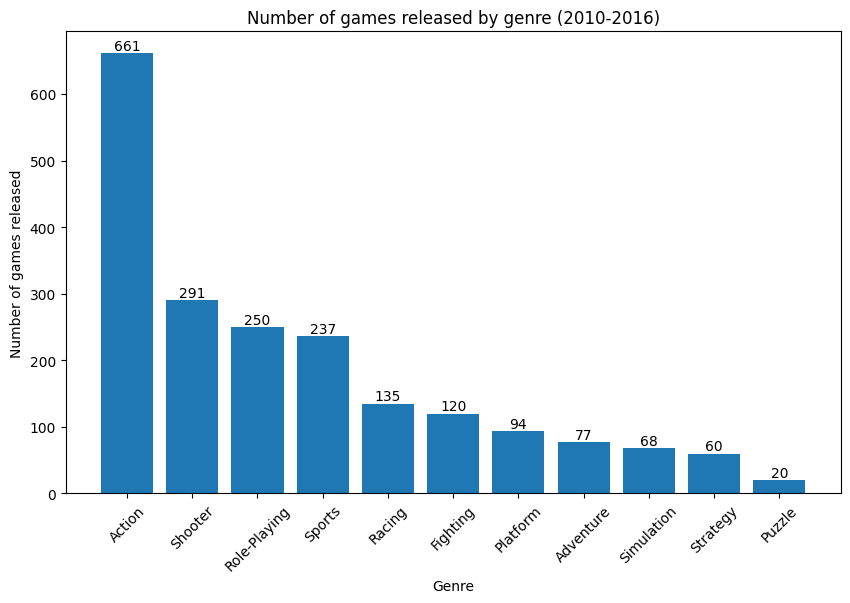

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_container = ax.bar(data_count_by_genre.index, data_count_by_genre)
ax.set(xlabel='Genre', ylabel='Number of games released')
ax.set(title=f'Number of games released by genre ({year_range})')
ax.set_xticklabels(data_count_by_genre.index, rotation=45)
ax.bar_label(bar_container)
fig.show()

### Sales by genre

Chosen genres:
* Action
* Shooter
* Role-playing
* Sport

In [81]:
chosen_genres = ['Shooter', 'Role-Playing', 'Sports']

In [96]:
data_clean.groupby('Genre')['Global_Sales'].describe().loc[chosen_genres]

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Shooter,291.0,1.403918,2.443469,0.01,0.20,0.560,1.46,14.73
Role-Playing,250.0,0.696400,1.156710,0.01,0.12,0.265,0.77,8.79
Sports,237.0,0.956456,1.268947,0.01,0.22,0.510,1.09,8.57


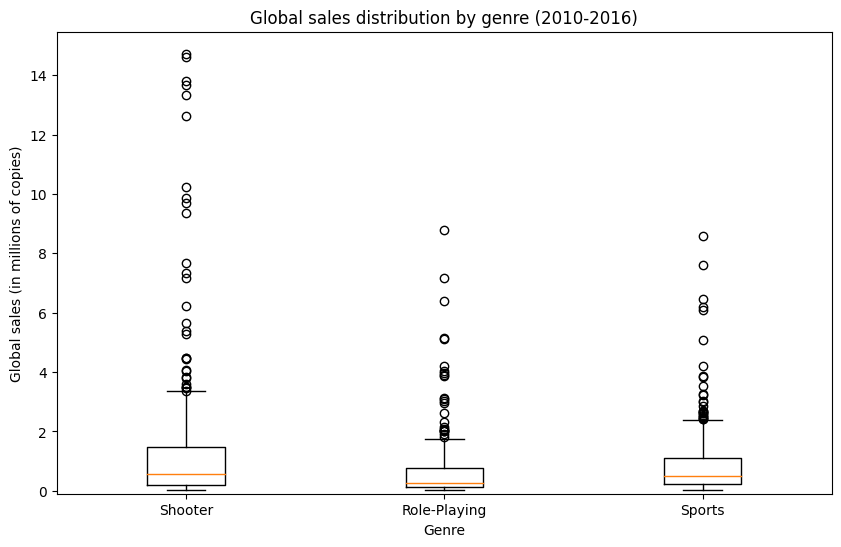

In [83]:
plt.figure(figsize=(10, 6))
plt.boxplot([data_clean[data_clean['Genre'] == genre]['Global_Sales'] for genre in chosen_genres],
            labels=chosen_genres)
plt.xlabel('Genre')
plt.ylabel('Global sales (in millions of copies)')
plt.ylim(bottom=-0.1)
plt.title(f'Global sales distribution by genre ({year_range})')
plt.show()

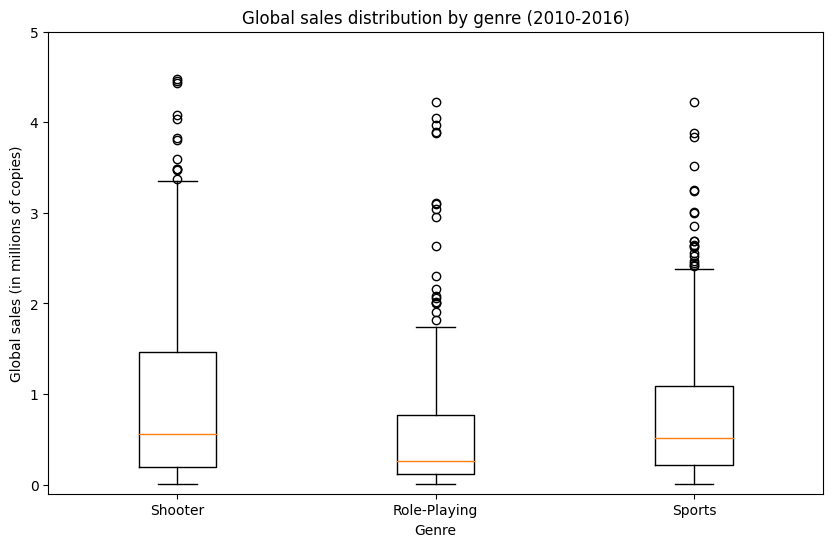

In [84]:
# scoped chart
plt.figure(figsize=(10, 6))
plt.boxplot([data_clean[data_clean['Genre'] == genre]['Global_Sales'] for genre in chosen_genres],
            labels=chosen_genres)
plt.xlabel('Genre')
plt.ylabel('Global sales (in millions of copies)')
plt.ylim(bottom=-0.1, top=5)
plt.title(f'Global sales distribution by genre ({year_range})')
plt.show()

## Region analysis

### Sales by region

In [46]:
region_sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_labels = ['North America', 'EU', 'Japan', 'Others']

In [47]:
data_shooter = data_clean[data_clean['Genre'] == 'Shooter']

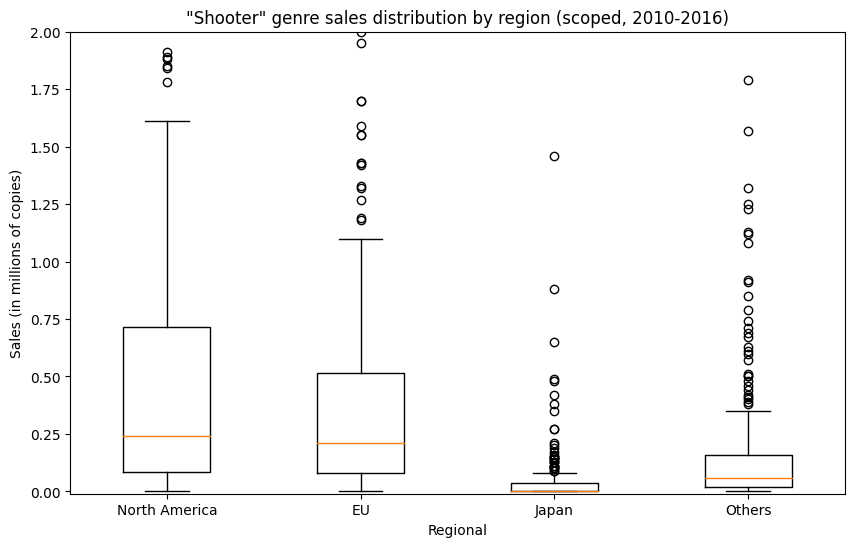

In [48]:
plt.figure(figsize=figure_size)
plt.boxplot([data_shooter[region] for region in region_sales],
            labels=region_labels)
plt.xlabel('Regional')
plt.ylabel('Sales (in millions of copies)')
plt.ylim(bottom=-0.01, top=2)
plt.title(f'"Shooter" genre sales distribution by region (scoped, {year_range})')
plt.show()

In [49]:
data_shooter_sales_total_by_region = data_shooter.iloc[:, 5:9].sum(axis=0)
data_shooter_sales_total_by_region

NA_Sales       203.81
EU_Sales       145.11
JP_Sales        11.90
Other_Sales     47.71
dtype: float64

In [50]:
def label_format(labels):
    return [f'{label}\n({"{:.2f}".format(sales)} million copies)' for label, sales in zip(labels, data_shooter_sales_total_by_region)]

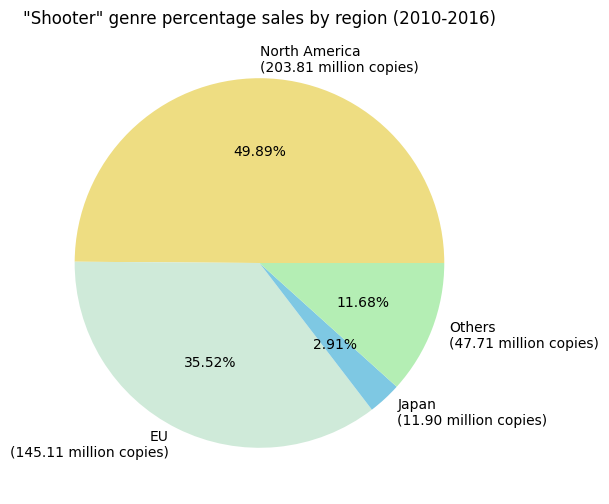

In [51]:
plt.figure(figsize=figure_size)
plt.pie(data_shooter_sales_total_by_region,
        labels=label_format(['North America', 'EU', 'Japan', 'Others']),
        colors=['#eedd82', '#cfead9', '#7EC8E3', '#b4eeb4'],
        autopct='%.2f%%')
plt.title(f'"Shooter" genre percentage sales by region ({year_range})')
plt.show()

### Sales in NA region

In [68]:
data_sales_prop_by_year = data_clean.iloc[:, [2, 5, 6, 7, 8, 9]]
data_sales_prop_by_year.insert(data_sales_prop_by_year.columns.size, 'NA_Sales_Prop',
                               data_sales_prop_by_year['NA_Sales'] / data_sales_prop_by_year['Global_Sales'] * 100)
data_sales_prop_by_year.insert(data_sales_prop_by_year.columns.size, 'EU_Sales_Prop',
                               data_sales_prop_by_year['EU_Sales'] / data_sales_prop_by_year['Global_Sales'] * 100)
data_sales_prop_by_year.insert(data_sales_prop_by_year.columns.size, 'JP_Sales_Prop',
                               data_sales_prop_by_year['JP_Sales'] / data_sales_prop_by_year['Global_Sales'] * 100)
data_sales_prop_by_year

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_Prop,EU_Sales_Prop,JP_Sales_Prop
14,2010.0,15.00,4.89,0.24,1.69,21.81,68.775791,22.420908,1.100413
16,2013.0,7.02,9.09,0.98,3.96,21.04,33.365019,43.203422,4.657795
23,2013.0,9.66,5.14,0.06,1.41,16.27,59.373079,31.591887,0.368777
29,2011.0,9.04,4.24,0.13,1.32,14.73,61.371351,28.784793,0.882553
32,2010.0,9.70,3.68,0.11,1.13,14.61,66.392882,25.188227,0.752909
...,...,...,...,...,...,...,...,...,...
16634,2016.0,0.00,0.01,0.00,0.00,0.01,0.000000,100.000000,0.000000
16656,2016.0,0.00,0.01,0.00,0.00,0.01,0.000000,100.000000,0.000000
16696,2014.0,0.00,0.01,0.00,0.00,0.01,0.000000,100.000000,0.000000
16700,2011.0,0.01,0.00,0.00,0.00,0.01,100.000000,0.000000,0.000000


In [69]:
data_sales_prop_by_year_na = data_sales_prop_by_year[['Year_of_Release', 'NA_Sales_Prop', 'Global_Sales']]
data_sales_prop_by_year_na = data_sales_prop_by_year_na.sort_values(by='Global_Sales', ascending=False)
data_sales_prop_by_year_na = data_sales_prop_by_year_na.iloc[:1000]
data_sales_prop_by_year_na

,Year_of_Release,NA_Sales_Prop,Global_Sales
14,2010.0,68.775791,21.81
16,2013.0,33.365019,21.04
23,2013.0,59.373079,16.27
29,2011.0,61.371351,14.73
32,2010.0,66.392882,14.61
...,...,...,...
4967,2013.0,57.894737,0.38
5150,2012.0,67.567568,0.37
5131,2016.0,10.810811,0.37
5113,2010.0,24.324324,0.37


Text(0.5, 1.0, 'NA sales proportion distribution by year (2010-2016)')

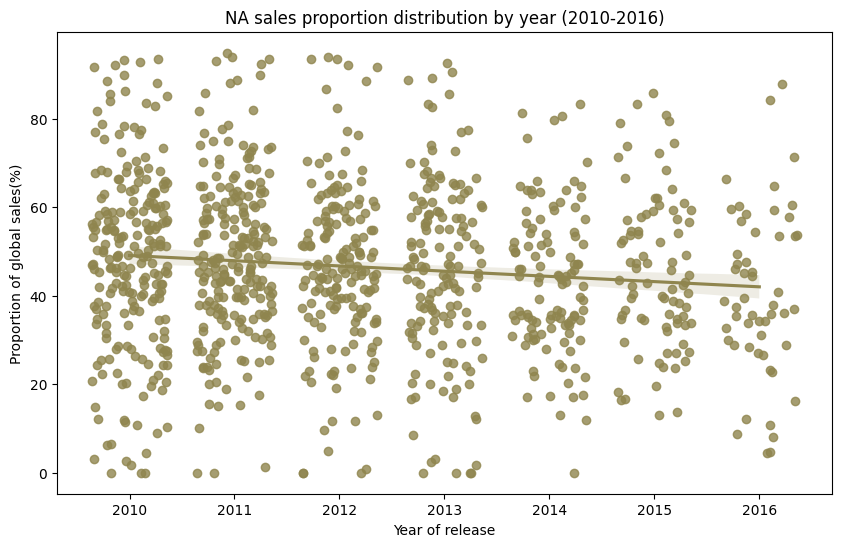

In [70]:
fig, ax = plt.subplots(figsize=figure_size)
sns.regplot(x='Year_of_Release', y='NA_Sales_Prop', data=data_sales_prop_by_year_na,
           robust=True, x_jitter=0.36, ax=ax, color='#8f854e')
ax.set(xlabel='Year of release', ylabel='Proportion of global sales(%)')
ax.set_title(f'NA sales proportion distribution by year ({year_range})')

### Sales in EU region

In [71]:
data_sales_prop_by_year_eu = data_sales_prop_by_year[['Year_of_Release', 'EU_Sales_Prop', 'Global_Sales']]
data_sales_prop_by_year_eu = data_sales_prop_by_year_eu.sort_values(by='Global_Sales', ascending=False)
data_sales_prop_by_year_eu = data_sales_prop_by_year_eu.iloc[:1000]
data_sales_prop_by_year_eu

,Year_of_Release,EU_Sales_Prop,Global_Sales
14,2010.0,22.420908,21.81
16,2013.0,43.203422,21.04
23,2013.0,31.591887,16.27
29,2011.0,28.784793,14.73
32,2010.0,25.188227,14.61
...,...,...,...
4967,2013.0,34.210526,0.38
5150,2012.0,24.324324,0.37
5131,2016.0,72.972973,0.37
5113,2010.0,48.648649,0.37


Text(0.5, 1.0, 'EU sales proportion distribution by year (2010-2016)')

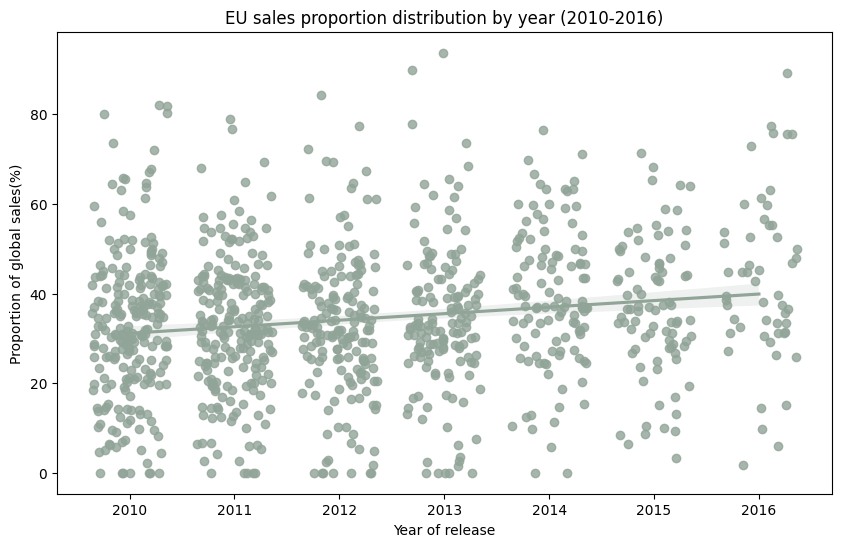

In [72]:
fig, ax = plt.subplots(figsize=figure_size)
sns.regplot(x='Year_of_Release', y='EU_Sales_Prop', data=data_sales_prop_by_year_eu,
           robust=True, x_jitter=0.36, ax=ax, color='#91a498')
ax.set(xlabel='Year of release', ylabel='Proportion of global sales(%)')
ax.set_title(f'EU sales proportion distribution by year ({year_range})')

### Sales in JP region

In [73]:
data_sales_prop_by_year_jp = data_sales_prop_by_year[['Year_of_Release', 'JP_Sales_Prop', 'Global_Sales']]
data_sales_prop_by_year_jp = data_sales_prop_by_year_jp.sort_values(by='Global_Sales', ascending=False)
data_sales_prop_by_year_jp = data_sales_prop_by_year_jp.iloc[:1000]
data_sales_prop_by_year_jp

,Year_of_Release,JP_Sales_Prop,Global_Sales
14,2010.0,1.100413,21.81
16,2013.0,4.657795,21.04
23,2013.0,0.368777,16.27
29,2011.0,0.882553,14.73
32,2010.0,0.752909,14.61
...,...,...,...
4967,2013.0,0.000000,0.38
5150,2012.0,0.000000,0.37
5131,2016.0,0.000000,0.37
5113,2010.0,2.702703,0.37


Text(0.5, 1.0, 'JP sales proportion distribution by year (2010-2016)')

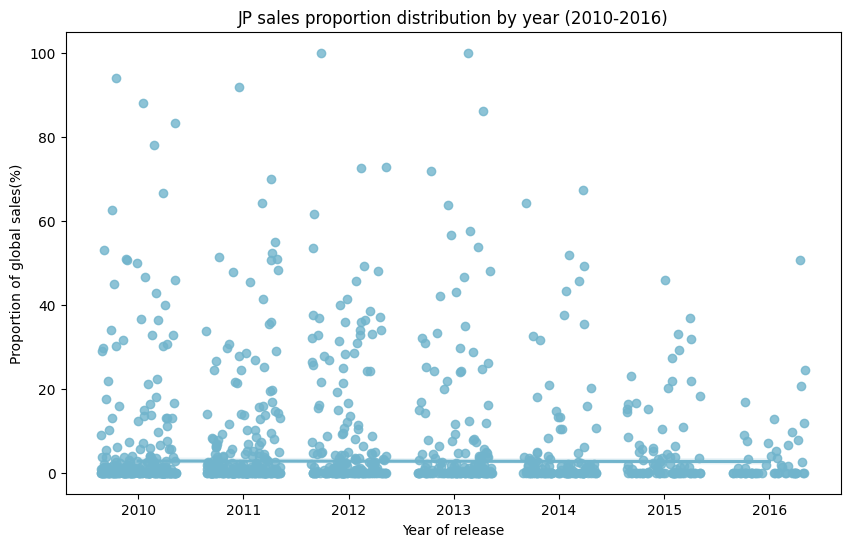

In [75]:
fig, ax = plt.subplots(figsize=figure_size)
sns.regplot(x='Year_of_Release', y='JP_Sales_Prop', data=data_sales_prop_by_year_jp,
           robust=True, x_jitter=0.36, ax=ax, color='#71b4cc')
ax.set(xlabel='Year of release', ylabel='Proportion of global sales(%)')
ax.set_title(f'JP sales proportion distribution by year ({year_range})')